# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 10

Group Members:
- Angelica Kiera Ninta Gurning (13522048)
- Immanuel Sebastian Girsan (13522058)
- Marzuli Suhada M (13522070)
- Muhammad Neo Cicero Koda (13522108)

## Import Libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [64]:
# Import dataset dari link Google Drive
def load_data_from_drive(file_url):
    file_id = file_url.split("/d/")[1].split("/view")[0]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    return pd.read_csv(download_url)

# Link dataset dari Google Drive
additional_features_train_url = "https://drive.google.com/file/d/1GTK0JaBLVupIjtvqNqd0lnbasOEa_n8Q/view?usp=drive_link"
basic_features_train_url = "https://drive.google.com/file/d/10TbwlpAl4YnoqoS3cssK9HIUsLhpSqud/view?usp=drive_link"
content_features_train_url = "https://drive.google.com/file/d/1XTO1ZZX9pbh_snyjmGfm7ieL0K6rXKvs/view?usp=drive_link"
flow_features_train_url = "https://drive.google.com/file/d/1b-WtpGkqSSRtLVBvVRpVKBsJmOQnWDbg/view?usp=drive_link"
time_features_train_url = "https://drive.google.com/file/d/1OuPIWs5HSO4KwjCSETDGxwa_tMn6HkKK/view?usp=drive_link"
labels_train_url = "https://drive.google.com/file/d/1c1vlrV8g6KbCitMOsgslo2YzDaWrigVb/view?usp=drive_link"

# Load dataset
additional_features = load_data_from_drive(additional_features_train_url)
basic_features = load_data_from_drive(basic_features_train_url)
content_features = load_data_from_drive(content_features_train_url)
flow_features = load_data_from_drive(flow_features_train_url)
time_features = load_data_from_drive(time_features_train_url)
labels = load_data_from_drive(labels_train_url)

# Merge datasets based on "id" column
datasets = [additional_features, basic_features, content_features, flow_features, time_features, labels]
merged_data = pd.merge(datasets[0], datasets[1], on="id")
for i in range(2, len(datasets)):
    merged_data = pd.merge(merged_data, datasets[i], on="id")

# Drop "id" column after merging
merged_data = merged_data.drop(columns=["id"])

In [65]:
# URLs untuk dataset test
additional_features_test_url = "https://drive.google.com/file/d/1aY5EfAky4_86nab3Oyg_QrffviuT4Xi0/view?usp=sharing"
basic_features_test_url = "https://drive.google.com/file/d/1dtM7t2U7JYGPUwF-r2ta7xFvfSh51nwy/view?usp=sharing"
content_features_test_url = "https://drive.google.com/file/d/1XvPV8hoal2jF92-kaguoUcpjtPGOQqXd/view?usp=drive_link"
flow_features_test_url = "https://drive.google.com/file/d/1GaWGknP1j2L-TpPYLvmuUNPO7JBu78aD/view?usp=drive_link"
time_features_test_url = "https://drive.google.com/file/d/1i7RLlEUgV1b6j4VZS_ZRcqwTpZioGEdm/view?usp=drive_link"

# Load dataset test
additional_features_test = load_data_from_drive(additional_features_test_url)
basic_features_test = load_data_from_drive(basic_features_test_url)
content_features_test = load_data_from_drive(content_features_test_url)
flow_features_test = load_data_from_drive(flow_features_test_url)
time_features_test = load_data_from_drive(time_features_test_url)

# Gabungkan dataset berdasarkan "id"
datasets_test = [additional_features_test, basic_features_test, content_features_test, flow_features_test, time_features_test]
merged_test_data = pd.merge(datasets_test[0], datasets_test[1], on="id")
for i in range(2, len(datasets_test)):
    merged_test_data = pd.merge(merged_test_data, datasets_test[i], on="id")

# Drop kolom "id" setelah penggabungan
merged_test_data = merged_test_data.drop(columns=["id"])

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  state              166536 non-null  object 
 13  dur                166619 non-null  float64
 14  sbytes             166780 non-null  float64
 15  dbytes             166472 non-null  f

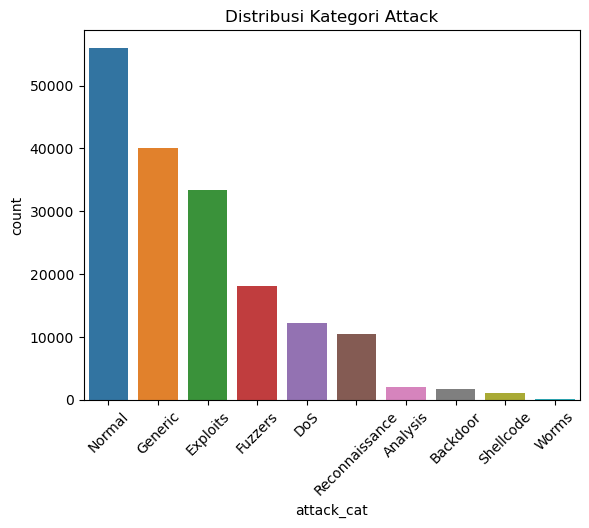

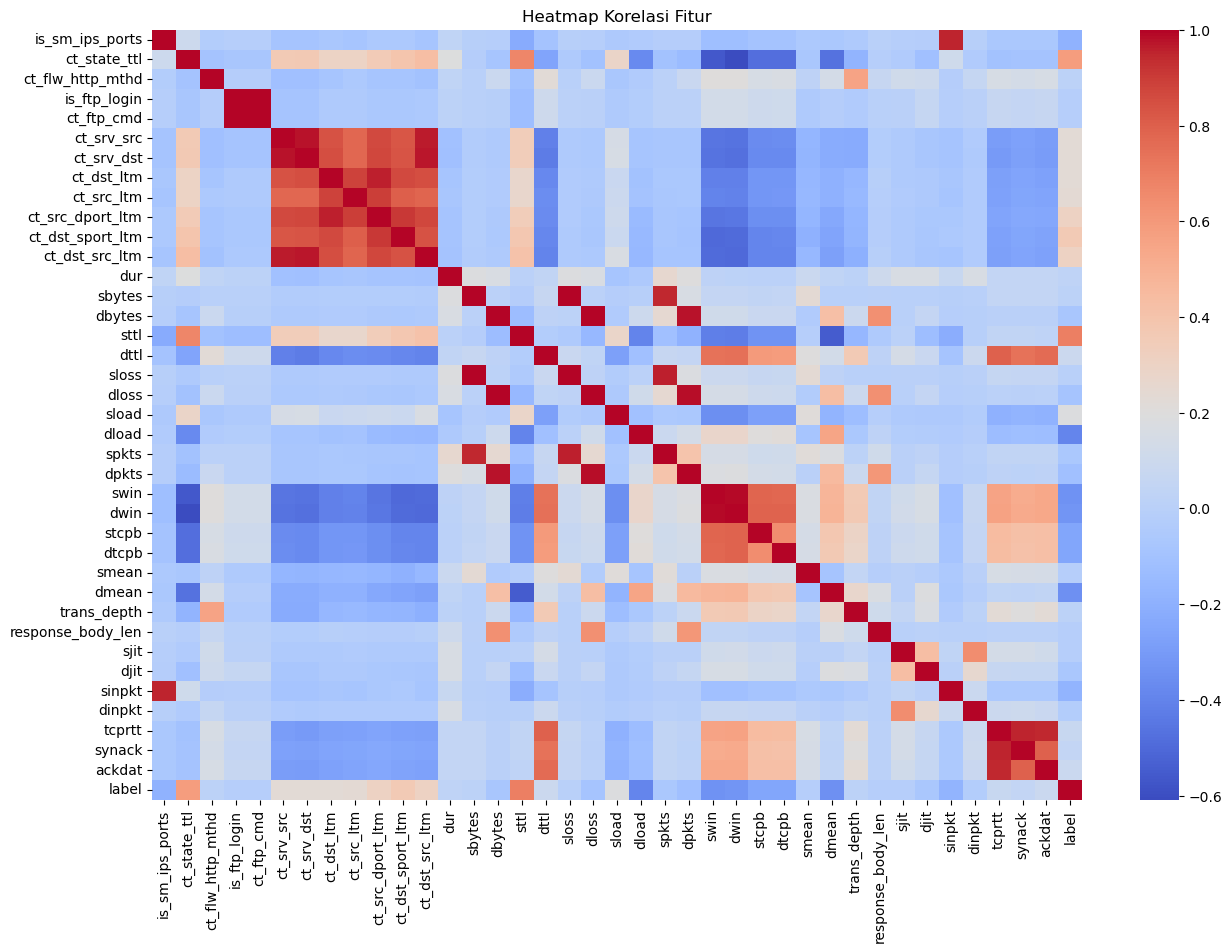

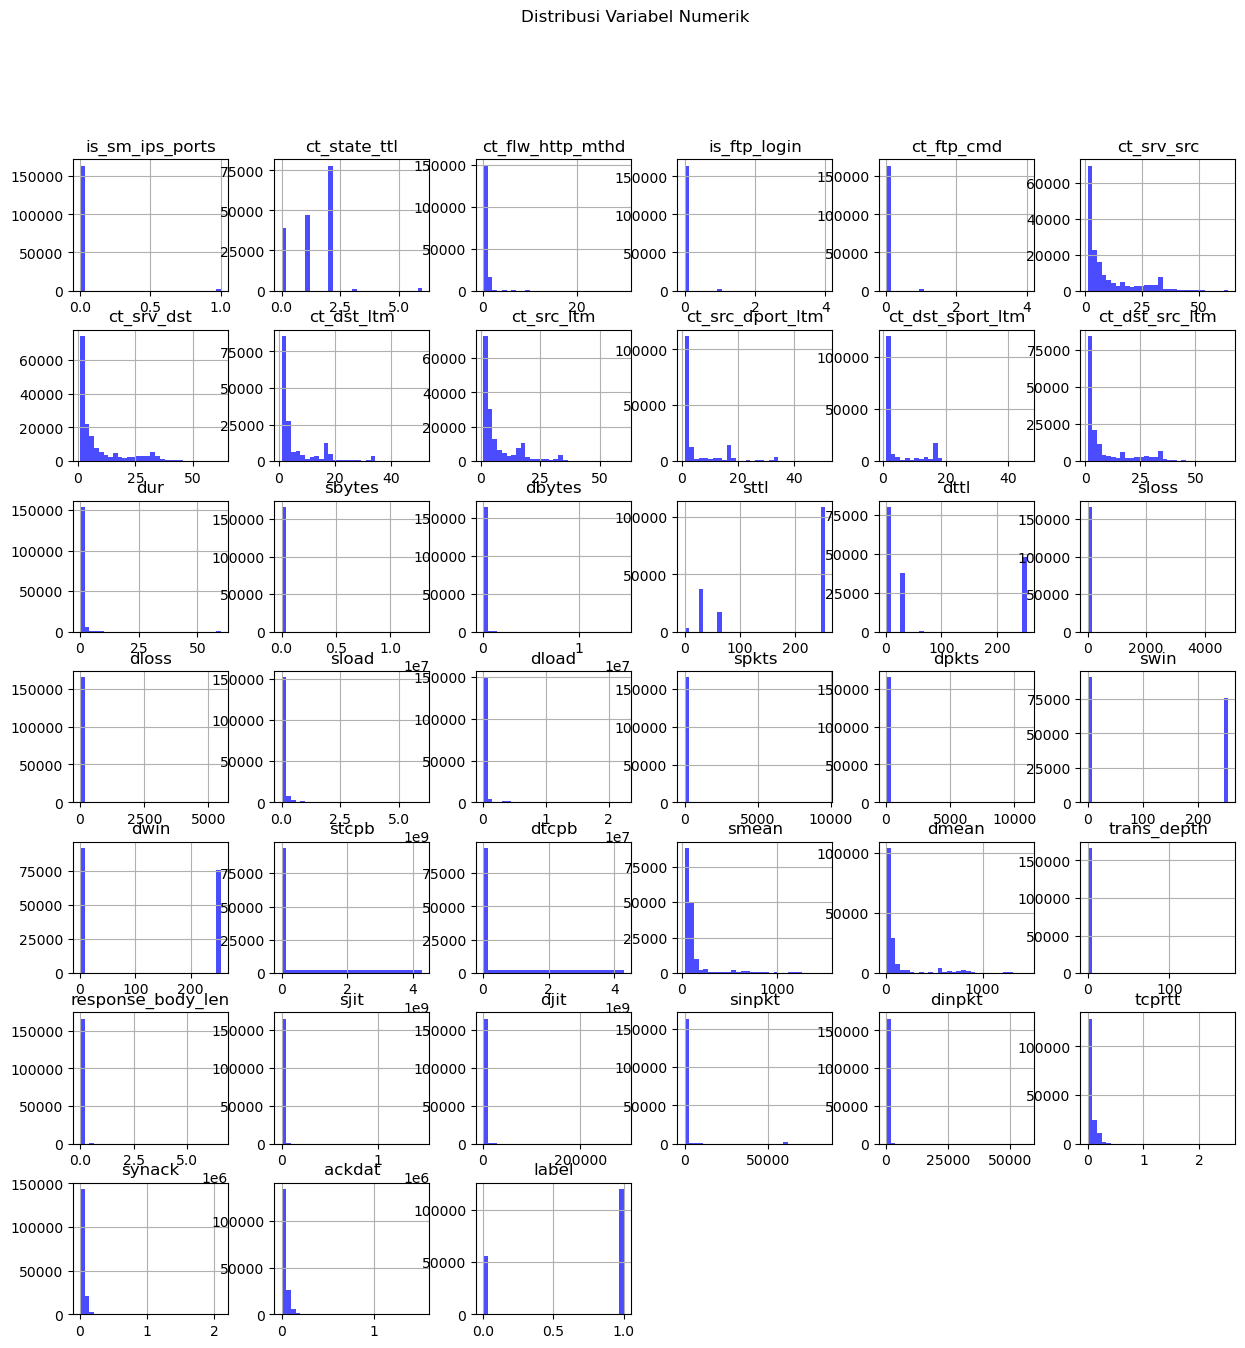

In [66]:
# Informasi Umum Dataset
print("Info Dataset:")
print(merged_data.info())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(merged_data.describe())

# Cek Missing Values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Distribusi Variabel Target (attack_cat)
sns.countplot(data=merged_data, x="attack_cat", order=merged_data["attack_cat"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Attack")
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(15, 10))
numeric_data = merged_data.select_dtypes(include=[np.number])
numeric_data = numeric_data.dropna()
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Visualisasi Distribusi Variabel Numerik
numerical_features = merged_data.select_dtypes(include=["float64", "int64"]).columns
merged_data[numerical_features].hist(bins=30, figsize=(15, 15), color="blue", alpha=0.7)
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [67]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
X = merged_data.drop(columns=["attack_cat", "label"])  # Drop variabel target
y = merged_data["attack_cat"]  # Variabel target

# Split data menjadi training set dan validation set
train_set, val_set, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran Training Set: {train_set.shape}")
print(f"Ukuran Validation Set: {val_set.shape}")


Ukuran Training Set: (140272, 41)
Ukuran Validation Set: (35069, 41)


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [68]:
from sklearn.impute import SimpleImputer

# Periksa jumlah missing values di setiap kolom
print("Missing values sebelum imputasi:")
print(merged_data.isnull().sum())

# Gunakan Mean Imputation untuk kolom numerik
imputer = SimpleImputer(strategy="mean")
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
merged_data[numeric_columns] = imputer.fit_transform(merged_data[numeric_columns])

# Cek ulang untuk memastikan tidak ada missing values
print("\nMissing values setelah imputasi:")
print(merged_data.isnull().sum())

Missing values sebelum imputasi:
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpk

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

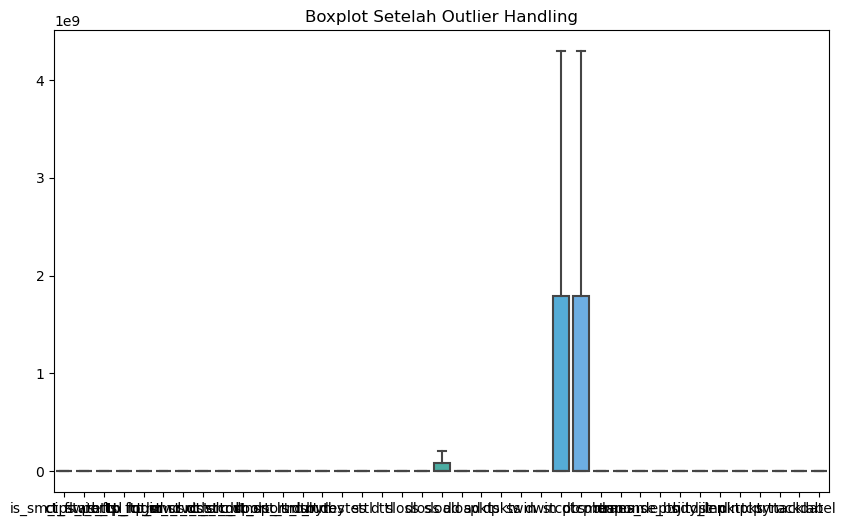

In [69]:
import matplotlib.pyplot as plt

# Identifikasi outlier menggunakan IQR (Interquartile Range)
Q1 = merged_data[numeric_columns].quantile(0.25)
Q3 = merged_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Buat batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clipping outlier
for col in numeric_columns:
    merged_data[col] = merged_data[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Visualisasi untuk memastikan clipping berhasil
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[numeric_columns])
plt.title("Boxplot Setelah Outlier Handling")
plt.show()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [70]:
# Periksa jumlah duplikat
print("Jumlah duplikat sebelum penghapusan:", merged_data.duplicated().sum())

# Hapus duplikat
merged_data = merged_data.drop_duplicates()

# Verifikasi ulang
print("Jumlah duplikat setelah penghapusan:", merged_data.duplicated().sum())

Jumlah duplikat sebelum penghapusan: 17236
Jumlah duplikat setelah penghapusan: 0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Normalisasi fitur numerik
scaler = StandardScaler()
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

# One-Hot Encoding untuk kolom kategorikal
categorical_columns = merged_data.select_dtypes(include=["object"]).columns
encoder = OneHotEncoder(sparse=False, drop="first")
encoded_features = encoder.fit_transform(merged_data[categorical_columns])

# Gabungkan kembali data
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
merged_data = pd.concat([merged_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
merged_data = merged_data.drop(columns=categorical_columns)

print("Data setelah feature engineering:")
print(merged_data.head())

Data setelah feature engineering:
   is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0     -1.440404               0.0           0.0         0.0   
1              0.0      0.957875               0.0           0.0         0.0   
2              0.0      0.123097               0.0           0.0         0.0   
3              0.0     -1.440404               0.0           0.0         0.0   
4              0.0     -1.440404               0.0           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ...  \
0    0.525838    0.291738    0.160150   -0.246404         -0.348299  ...   
1    0.387286    0.415076    1.325913    0.902316          0.554624  ...   
2   -0.444022   -0.411204   -0.539308   -0.629310         -0.614797  ...   
3    0.248735    0.277363   -0.306155   -0.629310         -0.348299  ...   
4   -0.582573   -0.548917   -0.073003   -0.437857         -0.614797  ...   

   proto_nan  attack_cat_Bac

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [72]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [73]:
# Write your code here
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method='standardization'):
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        if self.method == 'standardization':
            self.scaler = StandardScaler()
        elif self.method == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.method == 'robust':
            self.scaler = RobustScaler()
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [74]:
# Write your code here
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_type='onehot', columns=None):
        self.encoding_type = encoding_type
        self.columns = columns
        self.encoder = None

    def fit(self, X, y=None):
        if self.encoding_type == 'onehot':
            self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        elif self.encoding_type == 'label':
            self.encoder = LabelEncoder()
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_encoded = X.copy()
        if self.encoding_type == 'onehot':
            encoded_array = self.encoder.transform(X_encoded[self.columns])
            X_encoded = X_encoded.drop(columns=self.columns)
            return np.hstack([X_encoded.values, encoded_array])
        elif self.encoding_type == 'label':
            X_encoded[self.columns] = self.encoder.transform(X_encoded[self.columns])
        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [75]:
# Write your code here
from imblearn.over_sampling import SMOTE

class BalanceDataset(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='smote'):
        self.strategy = strategy
        self.sampler = None

    def fit(self, X, y=None):
        if self.strategy == 'smote':
            self.sampler = SMOTE()
        return self

    def transform(self, X, y):
        return self.sampler.fit_resample(X, y)

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [76]:
# Write your code here
from sklearn.preprocessing import Normalizer

class DataNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, norm='l2'):
        self.norm = norm
        self.normalizer = Normalizer(norm=self.norm)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.normalizer.transform(X)

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [77]:
# Write your code here
from sklearn.decomposition import PCA

class DimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        self.pca.fit(X)
        return self

    def transform(self, X):
        return self.pca.transform(X)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [78]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [79]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [82]:
# Write your code here
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Definisikan fitur numerik dan kategorikal
numerical_features = train_set.select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_set.select_dtypes(include=["object"]).columns

# Preprocessing untuk data numerik
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])

# Preprocessing untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Pipeline dengan imbalanced-learn
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("balancer", SMOTE()),  # Oversampling untuk menyeimbangkan kelas
    ("dim_reducer",  TruncatedSVD(n_components=5))  # Reduksi dimensi
])

# Terapkan pipeline pada training data
pipe.fit(train_set, y_train)

# Transform data setelah pipeline di-fit
# Transform data setelah pipeline di-fit
X_train_preprocessed = pipe.transform(train_set)

# Lakukan hal yang sama untuk validation set
X_val_preprocessed = pipe.transform(val_set)

print("Shape data setelah preprocessing:")
print(f"X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"X_val_preprocessed: {X_val_preprocessed.shape}")

y_train_balanced = y_train  # Karena balancing terjadi di pipeline, tidak perlu explicit resampling di sini

print("Preprocessing dan balancing selesai. Data siap digunakan untuk model.")

Shape data setelah preprocessing:
X_train_preprocessed: (140272, 5)
X_val_preprocessed: (35069, 5)
Preprocessing dan balancing selesai. Data siap digunakan untuk model.


In [84]:
# Terapkan pipeline pada dataset test
processed_test_data = pipe.transform(merged_test_data)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

KNN Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       396
      Backdoor       0.00      0.00      0.00       347
           DoS       0.05      0.01      0.01      2277
      Exploits       0.36      0.02      0.04      6392
       Fuzzers       0.12      0.01      0.03      3614
       Generic       0.00      0.00      0.00      4716
        Normal       0.37      0.98      0.54     10992
Reconnaissance       0.14      0.03      0.05      1996
     Shellcode       0.05      0.02      0.03       226
         Worms       0.00      0.00      0.00        26

      accuracy                           0.36     30982
     macro avg       0.11      0.11      0.07     30982
  weighted avg       0.23      0.36      0.21     30982



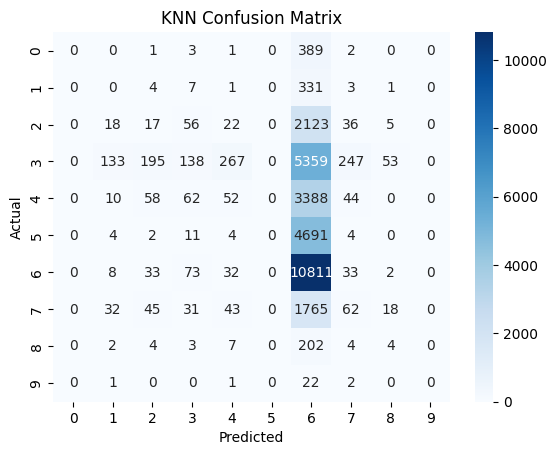

In [59]:
# Type your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit model
knn.fit(X_train_preprocessed, y_train_balanced)

# Evaluate on validation set
y_pred_knn = knn.predict(pipe.transform(val_set))

# Metrics
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## B. Naive Bayes

<class 'pandas.core.series.Series'>
Naive Bayes Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       396
      Backdoor       0.00      0.00      0.00       347
           DoS       0.00      0.00      0.00      2277
      Exploits       0.77      0.03      0.06      6392
       Fuzzers       0.11      0.00      0.01      3614
       Generic       0.00      0.00      0.00      4716
        Normal       0.36      1.00      0.53     10992
Reconnaissance       0.00      0.00      0.00      1996
     Shellcode       0.00      0.00      0.00       226
         Worms       0.00      0.00      0.00        26

      accuracy                           0.36     30982
     macro avg       0.12      0.10      0.06     30982
  weighted avg       0.30      0.36      0.20     30982



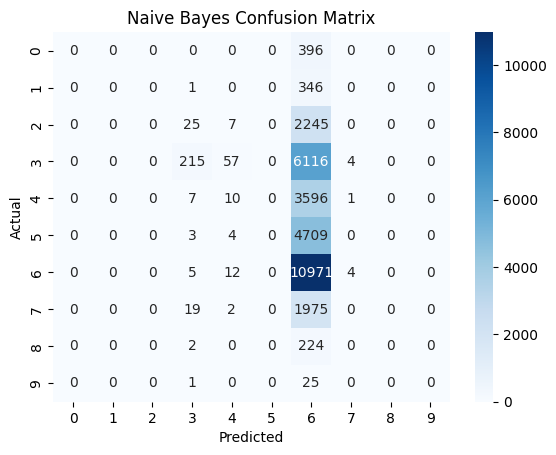

In [ ]:
import numpy as np
import pandas as pd
from math import pi, exp, sqrt
from collections import defaultdict

# Gaussian Naive Bayes from scratch
class GaussianNaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.feature_stats = None

    def fit(self, X, y):
        """
        Fit the model using X as training data and y as labels
        """
        self.class_probs = self._compute_class_probs(y)
        self.feature_stats = self._compute_feature_stats(X, y)

    def _compute_class_probs(self, y):
        """
        Compute probabilities of each class
        """
        class_probs = defaultdict(lambda: 0)
        total_samples = len(y)

        for label in y:
            class_probs[label] += 1
        
        for label in class_probs:
            class_probs[label] /= total_samples
        
        return class_probs
    
    def _compute_feature_stats(self, X, y):
        """
        Compute mean and variance of each feature ()
        """
        feature_stats = defaultdict(lambda: defaultdict(lambda: {'mean': 0, 'var': 0, 'count': 0}))
        
        # Compute sum, squared sum, and count of each feature
        for i in range(len(X)):
            label = y.iloc[i]
            for j in range(len(X[i])):
                feature_value = X[i][j]
                feature_stats[label][j]['mean'] += feature_value
                feature_stats[label][j]['var'] += feature_value ** 2
                feature_stats[label][j]['count'] += 1
        
        # Compute mean and variance by dividing by count
        for label in feature_stats:
            for feature_index in feature_stats[label]:
                count = feature_stats[label][feature_index]['count']
                mean = feature_stats[label][feature_index]['mean'] / count
                variance = (feature_stats[label][feature_index]['var'] / count) - mean ** 2
                feature_stats[label][feature_index]['mean'] = mean
                feature_stats[label][feature_index]['var'] = variance
        
        return feature_stats
    
    def _gaussian_pdf(self, x, mean, var):
        """
        The probability density function based on Gaussian distribution
        """
        if var == 0:
            return 1 if x == mean else 0
        coefficient = 1 / sqrt(2 * pi * var)
        exponent = exp(-(x - mean) ** 2 / (2 * var))
        return coefficient * exponent

    def predict(self, X):
        """
        Predict class labels for input data X
        """
        predictions = []
        
        for sample in X:
            class_probs = self.class_probs.copy()
            for label in self.class_probs:
                prob = np.log(class_probs[label])  # Use log to avoid numerical underflow
                
                for feature_index in range(len(sample)):
                    mean = self.feature_stats[label][feature_index]['mean']
                    var = self.feature_stats[label][feature_index]['var']
                    feature_value = sample[feature_index]
                    prob += np.log(self._gaussian_pdf(feature_value, mean, var))
                
                class_probs[label] = prob
            
            # Get the class with the highest log-probability
            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)


Naive Bayes Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       396
      Backdoor       0.00      0.00      0.00       347
           DoS       0.00      0.00      0.00      2277
      Exploits       0.77      0.03      0.06      6392
       Fuzzers       0.11      0.00      0.01      3614
       Generic       0.00      0.00      0.00      4716
        Normal       0.36      1.00      0.53     10992
Reconnaissance       0.00      0.00      0.00      1996
     Shellcode       0.00      0.00      0.00       226
         Worms       0.00      0.00      0.00        26

      accuracy                           0.36     30982
     macro avg       0.12      0.10      0.06     30982
  weighted avg       0.30      0.36      0.20     30982



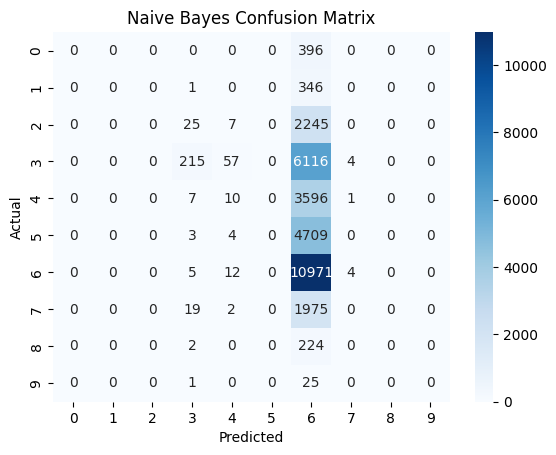

In [82]:
# Model Naive Bayes
nb = GaussianNaiveBayes()

# Fit model
nb.fit(X_train_preprocessed, y_train_balanced)

# Evaluate on validation set
y_pred_nb = nb.predict(pipe.transform(val_set))

# Metrics
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Naive Bayes Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       396
      Backdoor       0.00      0.00      0.00       347
           DoS       0.00      0.00      0.00      2277
      Exploits       0.77      0.03      0.06      6392
       Fuzzers       0.11      0.00      0.01      3614
       Generic       0.00      0.00      0.00      4716
        Normal       0.36      1.00      0.53     10992
Reconnaissance       0.00      0.00      0.00      1996
     Shellcode       0.00      0.00      0.00       226
         Worms       0.00      0.00      0.00        26

      accuracy                           0.36     30982
     macro avg       0.12      0.10      0.06     30982
  weighted avg       0.30      0.36      0.20     30982



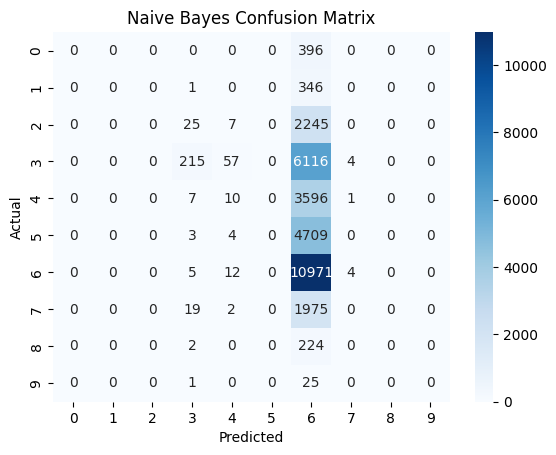

In [83]:
# Type your code here
from sklearn.naive_bayes import GaussianNB

# Model Naive Bayes
nb = GaussianNB()

# Fit model
nb.fit(X_train_preprocessed, y_train_balanced)

# Evaluate on validation set
y_pred_nb = nb.predict(pipe.transform(val_set))

# Metrics
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## C. ID3

ID3 Classification Report:
                precision    recall  f1-score   support

      Analysis       0.11      0.12      0.11       400
      Backdoor       0.04      0.04      0.04       349
           DoS       0.26      0.29      0.27      2453
      Exploits       0.58      0.57      0.57      6679
       Fuzzers       0.44      0.43      0.43      3637
       Generic       0.96      0.96      0.96      8000
        Normal       0.85      0.85      0.85     11200
Reconnaissance       0.38      0.36      0.37      2098
     Shellcode       0.14      0.12      0.13       227
         Worms       0.09      0.12      0.10        26

      accuracy                           0.69     35069
     macro avg       0.38      0.39      0.38     35069
  weighted avg       0.69      0.69      0.69     35069



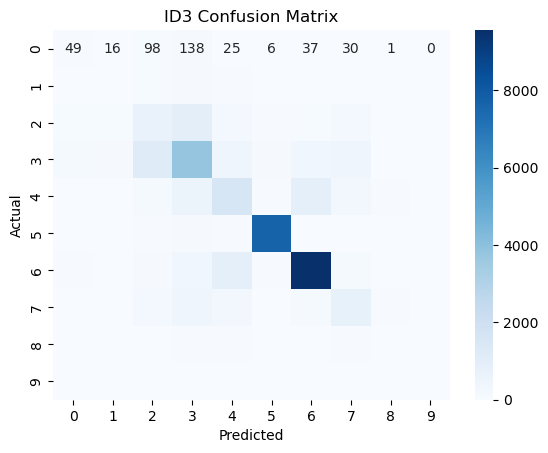

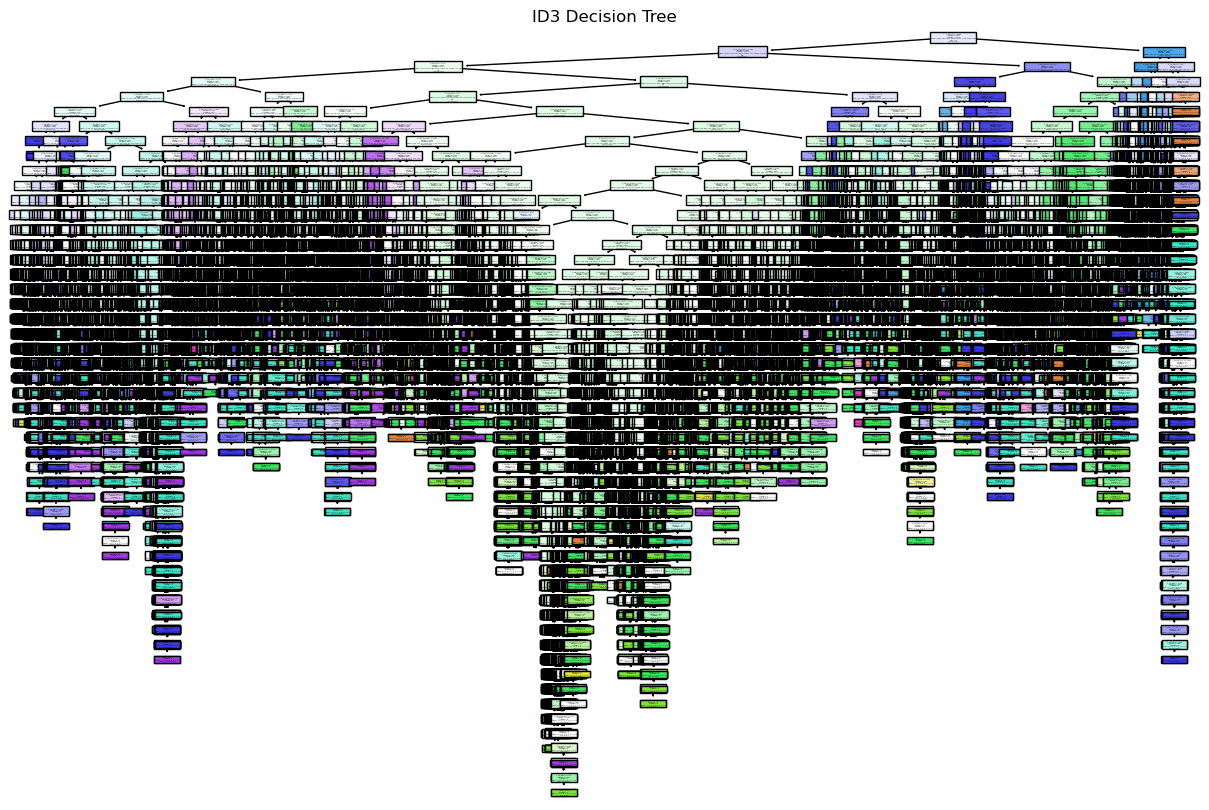

In [87]:
# Type your code here
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model ID3 (Decision Tree)
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit model
id3.fit(X_train_preprocessed, y_train_balanced)

# Evaluate on validation set
y_pred_id3 = id3.predict(pipe.transform(val_set))

# Metrics
print("ID3 Classification Report:")
print(classification_report(y_val, y_pred_id3))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_id3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("ID3 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(id3, feature_names=train_set.columns, class_names=id3.classes_, filled=True)
plt.title("ID3 Decision Tree")
plt.show()

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [88]:
# Type your code here
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Hyperparameter Tuning and Evaluation for KNN
def knn_tuning(X_train, y_train, X_val, y_val):
    print("Tuning KNN...")
    param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_

    # Validation Performance
    y_pred = best_knn.predict(X_val)
    print("\nBest KNN Parameters:", grid_search.best_params_)
    print("KNN Classification Report:")
    print(classification_report(y_val, y_pred))

    return best_knn, y_pred

# Hyperparameter Tuning and Evaluation for Naive Bayes
def naive_bayes_tuning(X_train, y_train, X_val, y_val):
    print("Tuning Naive Bayes...")
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Validation Performance
    y_pred = model.predict(X_val)
    print("\nNaive Bayes Classification Report:")
    print(classification_report(y_val, y_pred))

    return model, y_pred

# Hyperparameter Tuning and Evaluation for ID3 (Decision Tree)
def id3_tuning(X_train, y_train, X_val, y_val):
    print("Tuning ID3...")
    param_grid = {'max_depth': [None, 5, 10, 15], 'criterion': ['gini', 'entropy']}
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_id3 = grid_search.best_estimator_

    # Validation Performance
    y_pred = best_id3.predict(X_val)
    print("\nBest ID3 Parameters:", grid_search.best_params_)
    print("ID3 Classification Report:")
    print(classification_report(y_val, y_pred))

    return best_id3, y_pred

# Visualize ROC Curve
def plot_roc_curve(model, X_val, y_val, classes):
    y_val_binarized = label_binarize(y_val, classes=classes)
    y_pred_proba = model.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve
    plt.figure()
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Main Execution
def main_model_improvement(X_train_preprocessed, y_train, X_val, y_val, classes):
    # KNN
    knn_model, knn_pred = knn_tuning(X_train_preprocessed, y_train, X_val, y_val)

    # Naive Bayes
    nb_model, nb_pred = naive_bayes_tuning(X_train_preprocessed, y_train, X_val, y_val)

    # ID3
    id3_model, id3_pred = id3_tuning(X_train_preprocessed, y_train, X_val, y_val)

    # Compare Accuracy
    knn_acc = accuracy_score(y_val, knn_pred)
    nb_acc = accuracy_score(y_val, nb_pred)
    id3_acc = accuracy_score(y_val, id3_pred)
    print(f"\nAccuracy Comparison:\nKNN: {knn_acc:.4f}\nNaive Bayes: {nb_acc:.4f}\nID3: {id3_acc:.4f}")

    # Best Model Selection
    best_model = max([(knn_model, knn_acc), (nb_model, nb_acc), (id3_model, id3_acc)], key=lambda x: x[1])[0]
    print("\nSelected Best Model for Submission!")

    # Visualize ROC Curve
    plot_roc_curve(best_model, X_val, y_val, classes=classes)

    return best_model

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here
# Evaluasi untuk menentukan model terbaik
models = {
    "KNN": knn,
    "Naive Bayes": nb,
    "ID3": id3
}

# Validasi model dan pilih yang terbaik berdasarkan akurasi
val_predictions = {
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "ID3": y_pred_id3
}

accuracies = {
    name: accuracy_score(y_val, preds)
    for name, preds in val_predictions.items()
}

# Model terbaik berdasarkan akurasi pada validation set
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"Model terbaik adalah: {best_model_name} dengan akurasi {accuracies[best_model_name]:.4f}")

# Gunakan model terbaik untuk memprediksi test set
test_predictions = best_model.predict(processed_test_data)

# Buat DataFrame untuk submission
submission = pd.DataFrame({
    "id": datasets_test[0]["id"],  # Ambil kembali kolom 'id' dari dataset test
    "attack_cat": test_predictions
})

# Pastikan format kolom sesuai
submission["attack_cat"] = submission["attack_cat"].astype(str)

# Simpan ke file CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")

Model terbaik adalah: ID3 dengan akurasi 0.6884
Submission file saved as 'submission.csv'


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`